# Clustering

## 1. K-Means

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

## Step 1 - Data Ingestion

In [3]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Problem statement -  Categorize similar customers based on income and spending

## Step 2 - Perform Basic Data quality checks

In [4]:
df.shape

(200, 5)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isna().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Spending      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Step 3 - Separate X value

In [8]:
X = df[["Income", "Spending"]]
X.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


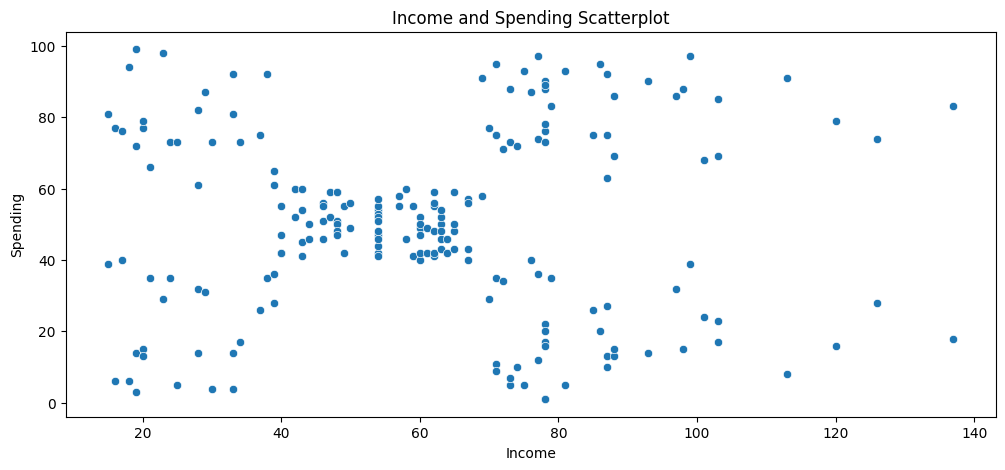

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.scatterplot(data=X, x="Income", y="Spending")
plt.title("Income and Spending Scatterplot")
plt.show()

## Step 4 - Apply Preprocessing on X

In [10]:
X.dtypes

Income      int64
Spending    int64
dtype: object

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [12]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [13]:
num_pipe.fit(X) # type: ignore

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [14]:
X_pre = num_pipe.transform(X) # type: ignore
X_pre.head()

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


## Step 5 - Find Optimal K with K-means clustering

In [15]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=42)
model.fit(X_pre)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [16]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [17]:
model.inertia_

273.66888662642015

In [18]:
list(range(1,15))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [19]:
# Decide number of clusters range

k = range(1, 15)

# initialize blank inertia list
inertias = []

# Apply for loop on k
for i in k:
    model = KMeans(random_state=42, n_clusters=i)
    model.fit(X)
    inertia_score = model.inertia_
    print(f"Number of clusters : {i}, Inertia : {inertia_score:.2f}")
    inertias.append(inertia_score)

Number of clusters : 1, Inertia : 269981.28
Number of clusters : 2, Inertia : 183653.33
Number of clusters : 3, Inertia : 106348.37
Number of clusters : 4, Inertia : 73880.64
Number of clusters : 5, Inertia : 44448.46
Number of clusters : 6, Inertia : 40825.17
Number of clusters : 7, Inertia : 33642.58
Number of clusters : 8, Inertia : 26686.84
Number of clusters : 9, Inertia : 24766.47
Number of clusters : 10, Inertia : 23103.12
Number of clusters : 11, Inertia : 18912.01
Number of clusters : 12, Inertia : 17425.01
Number of clusters : 13, Inertia : 15168.50
Number of clusters : 14, Inertia : 14466.21


## Package to find the elbow - kneed

In [20]:
!uv add kneed

Resolved 71 packages in 2ms
Audited 64 packages in 0.12ms


In [21]:
k

range(1, 15)

In [22]:
inertias

[269981.28,
 183653.3289473684,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 40825.16946386946,
 33642.579220779226,
 26686.83778518778,
 24766.471609793443,
 23103.122085983916,
 18912.01248078514,
 17425.00512987013,
 15168.498192909188,
 14466.2073826612]

In [23]:
from kneed import KneeLocator
knee = KneeLocator(k, inertias, curve="convex", direction="decreasing")
best_k = knee.elbow
print(f"Elbow found at k = {best_k}")

Elbow found at k = 5


## Plot the elbow curve


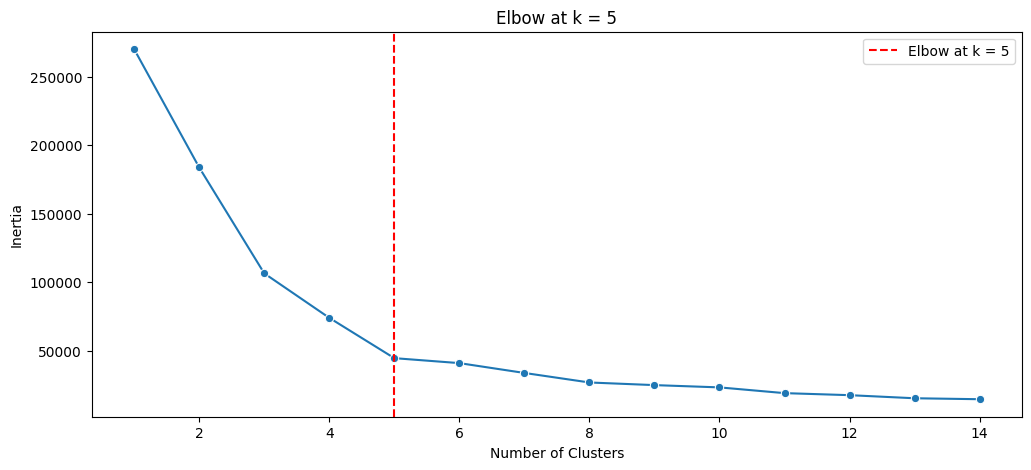

In [24]:
plt.figure(figsize=(12, 5))
sns.lineplot(x = k, y = inertias, marker="o")  
plt.axvline(x= best_k, color="red", linestyle="--", label=f"Elbow at k = {best_k}") 
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title(f"Elbow at k = {best_k}")
plt.legend()
plt.show()

## Step 6 - show best kmeans model

In [25]:
best_kmeans = KMeans(n_clusters=best_k) # type: ignore
labels1 = best_kmeans.fit_predict(X_pre)
labels1

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 0, 4, 2, 4, 2, 4,
       0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4], dtype=int32)

In [26]:
X1 = X.copy()
X1.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [27]:
X1["Label"] = labels1
X1

,Income,Spending,Label
0,15,39,1
1,15,81,3
2,16,6,1
3,16,77,3
4,17,40,1
...,...,...,...
195,120,79,4
196,126,28,2
197,126,74,4
198,137,18,2


In [28]:
X1["Label"].unique()

array([1, 3, 0, 4, 2], dtype=int32)

In [29]:
X1[X1["Label"] == 0]

,Income,Spending,Label
43,39,61,0
46,40,55,0
47,40,47,0
48,40,42,0
49,40,42,0
...,...,...,...
121,67,40,0
122,69,58,0
126,71,35,0
132,72,34,0


In [30]:
X1[X1["Label"] == 1]

,Income,Spending,Label
0,15,39,1
2,16,6,1
4,17,40,1
6,18,6,1
8,19,3,1
10,19,14,1
12,20,15,1
14,20,13,1
16,21,35,1
18,23,29,1


In [31]:
for i in range(best_k):
    print(f"Cluster : {i}")
    display(X1[X1["Label"] == i])
    print("\n=================================================\n")

Cluster : 0


,Income,Spending,Label
43,39,61,0
46,40,55,0
47,40,47,0
48,40,42,0
49,40,42,0
...,...,...,...
121,67,40,0
122,69,58,0
126,71,35,0
132,72,34,0




Cluster : 1


,Income,Spending,Label
0,15,39,1
2,16,6,1
4,17,40,1
6,18,6,1
8,19,3,1
10,19,14,1
12,20,15,1
14,20,13,1
16,21,35,1
18,23,29,1




Cluster : 2


,Income,Spending,Label
124,70,29,2
128,71,11,2
130,71,9,2
134,73,5,2
136,73,7,2
138,74,10,2
140,75,5,2
144,77,12,2
146,77,36,2
148,78,22,2




Cluster : 3


,Income,Spending,Label
1,15,81,3
3,16,77,3
5,17,76,3
7,18,94,3
9,19,72,3
11,19,99,3
13,20,77,3
15,20,79,3
17,21,66,3
19,23,98,3




Cluster : 4


,Income,Spending,Label
123,69,91,4
125,70,77,4
127,71,95,4
129,71,75,4
131,71,75,4
133,72,71,4
135,73,88,4
137,73,73,4
139,74,72,4
141,75,93,4


In [32]:
X1.to_csv("kmeans_results.csv", index=False)

## Calculate centroids

In [33]:
centroids = X1.groupby(by="Label").mean(numeric_only=True).round(2)
centroids

,Income,Spending
Label,,
0,55.30,49.52
1,26.30,20.91
2,88.20,17.11
3,25.73,79.36
4,86.54,82.13


## Plot the clusters with centroids

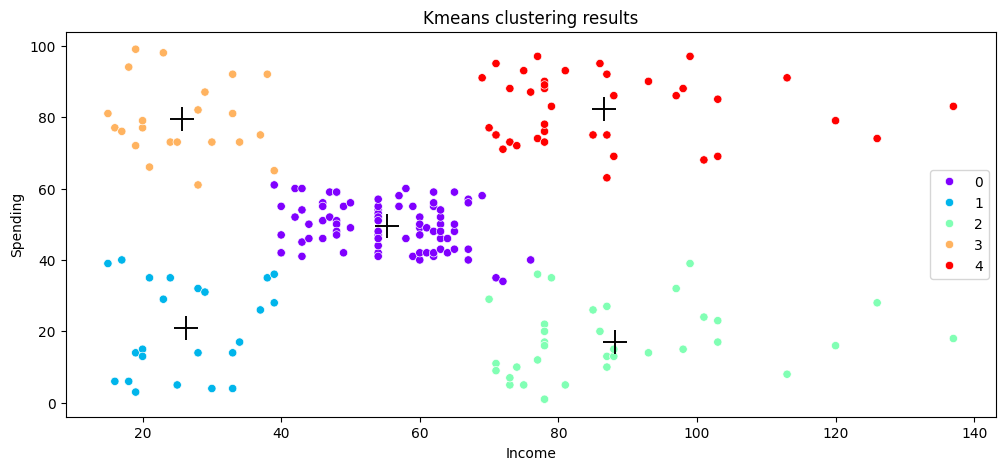

In [34]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=X1, x="Income", y="Spending", hue="Label", palette="rainbow")
sns.scatterplot(data=centroids, x="Income", y="Spending", color="black", marker="+", s=300)
plt.title("Kmeans clustering results")
plt.show()

## Agglomerative clustering (Bottom Up)

In [35]:
best_k

np.int64(5)

In [36]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=best_k)
labels2 = agg_model.fit_predict(X_pre)

In [37]:
labels2

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [38]:
X2 = X.copy()
X2.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [39]:
X2["Label"] = labels2
X2

,Income,Spending,Label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,0
197,126,74,1
198,137,18,0


In [40]:
for i in range(best_k):
    print(f"Cluster number : {i}")
    display(X2[X2["Label"] == i])
    print("\n=============================================\n")

Cluster number : 0


,Income,Spending,Label
128,71,11,0
130,71,9,0
134,73,5,0
136,73,7,0
138,74,10,0
140,75,5,0
144,77,12,0
148,78,22,0
150,78,17,0
152,78,20,0




Cluster number : 1


,Income,Spending,Label
123,69,91,1
125,70,77,1
127,71,95,1
129,71,75,1
131,71,75,1
133,72,71,1
135,73,88,1
137,73,73,1
139,74,72,1
141,75,93,1




Cluster number : 2


,Income,Spending,Label
43,39,61,2
45,39,65,2
46,40,55,2
47,40,47,2
48,40,42,2
...,...,...,...
126,71,35,2
132,72,34,2
142,76,40,2
146,77,36,2




Cluster number : 3


,Income,Spending,Label
1,15,81,3
3,16,77,3
5,17,76,3
7,18,94,3
9,19,72,3
11,19,99,3
13,20,77,3
15,20,79,3
17,21,66,3
19,23,98,3




Cluster number : 4


,Income,Spending,Label
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4


In [41]:
centroids2 = X2.groupby(by="Label").mean(numeric_only=True).round(2)
centroids2

,Income,Spending
Label,,
0,89.41,15.59
1,86.54,82.13
2,55.81,49.13
3,25.10,80.05
4,26.30,20.91


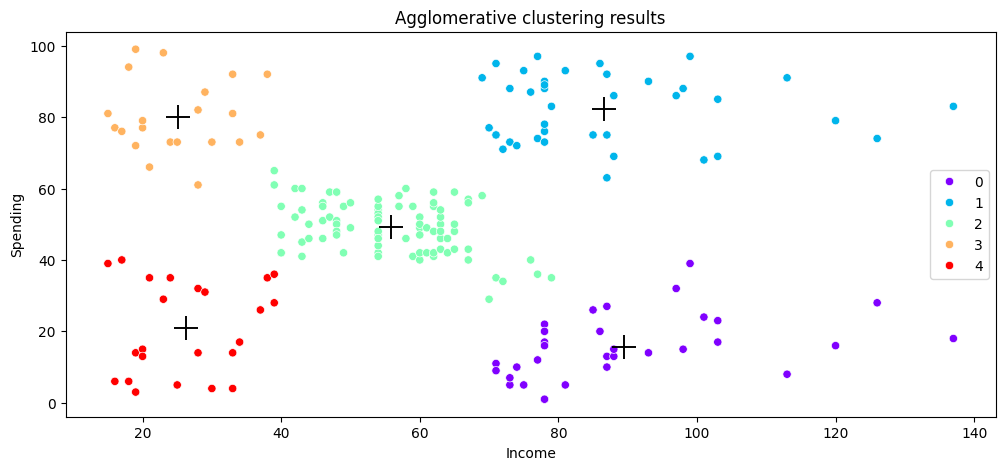

In [42]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=X2, x="Income", y="Spending", hue="Label", palette="rainbow")
sns.scatterplot(data=centroids2, x="Income", y="Spending", color="black", marker="+", s=300)
plt.title("Agglomerative clustering results")
plt.show()